In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

    1. Crosstab Analysis:
        a. Create a crosstab between the product category and the isBestSeller status.
        b. Are there categories where being a best-seller is more prevalent?
            Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

    2. Statistical Tests:
        a. Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
        b. Compute Cramér's V to understand the strength of association between best-seller status and category.

    3. Visualizations:
        a. Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [6]:
# 1.a. Create a crosstab between the product category and the isBestSeller status.
category_status_crosstab = pd.crosstab(df['category'], df['isBestSeller'])
category_status_crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [7]:
# 1.b. Are there categories where being a best-seller is more prevalent? Hint: one option is to calculate the 
#proportion of best-sellers for each category and then sort the categories based on this proportion in descending order
best_seller_proportion = df.groupby('category')['isBestSeller'].mean().reset_index()
best_seller_proportion.columns = ['category', 'BestSellerProportion']
best_seller_proportion = best_seller_proportion.sort_values(by='BestSellerProportion', ascending=False)
best_seller_proportion

,category,BestSellerProportion
109,Grocery,0.058135
254,Smart Home Security & Lighting,0.057692
126,Health & Personal Care,0.057686
185,Mobile Phone Accessories,0.042471
229,Power & Hand Tools,0.035339
...,...,...
38,"CD, Disc & Tape Players",0.000000
103,General Music-Making Accessories,0.000000
259,Snowboard Boots,0.000000
33,Boxes & Organisers,0.000000


In [8]:
# 2.a. Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
from scipy.stats import chi2_contingency
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(category_status_crosstab)
chi2_statistic, chi2_p_value
# p-value = 0.0 means that there is no evidence to believe that the two variables are independent

(36540.20270061387, 0.0)

In [9]:
# 2.b. Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats.contingency import association
association(category_status_crosstab, method="cramer")
# a cramer value of 0.12 suggests weak association between two variables

0.1222829439760564

<Axes: xlabel='category'>

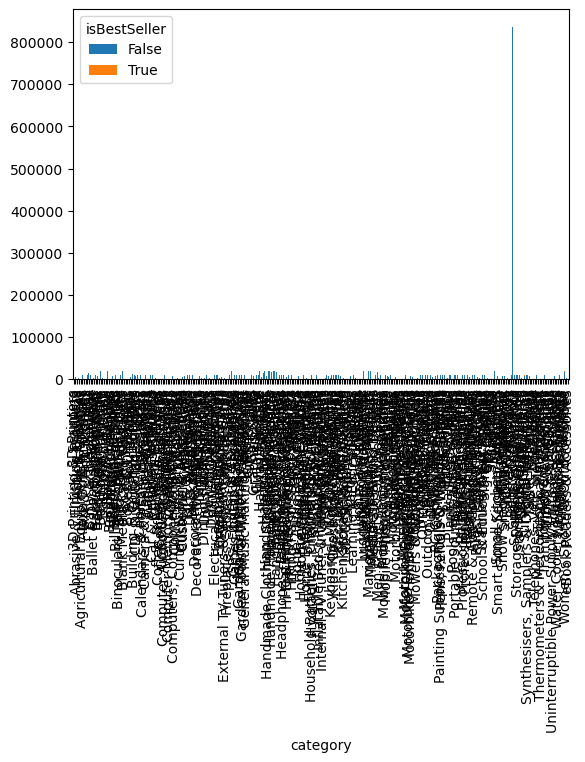

In [10]:
# 3.a. messy plot because 296 categories
category_status_crosstab.plot(kind="bar", stacked=True)

(0.0, 100000.0)

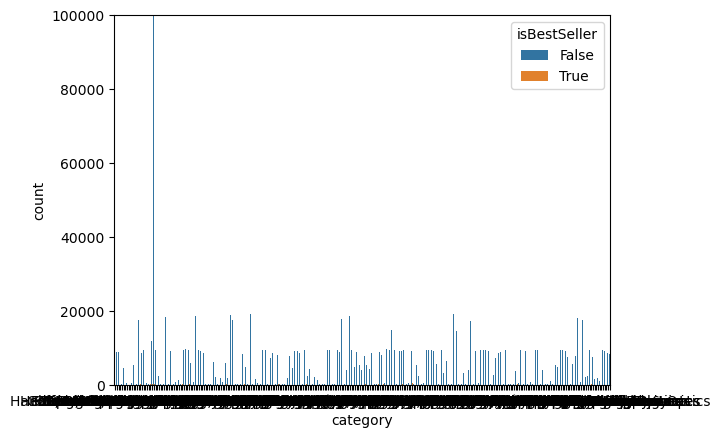

In [11]:
sns.countplot(data=df, x='category', hue='isBestSeller')
plt.ylim(0,100000)

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

    0. Preliminary Step: Remove outliers in product prices.
        For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
        Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

    1. Violin Plots:
        a. Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories               based on count for better visualization.
        b. Which product category tends to have the highest median price? Don't filter here by top categories.

    2. Bar Charts:
        a. Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
        b. Which product category commands the highest average price? Don't filter here by top categories.
    
    3. Box Plots:
        a. Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
        b. Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


In [13]:
# 0. Remove outliers in product prices.
def remove_outliers_tukey(df, column):
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    
    df_filtered = df[(df[column] >= lower_fence) & (df[column] <= upper_fence)]
    
    return df_filtered

In [14]:
df_cleaned = remove_outliers_tukey(df, 'price')
df_cleaned

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [15]:
# 1.a. Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories 
# based on count for better visualization.
category_counts = df_cleaned['category'].value_counts()
category_counts_top = category_counts.head(20)
category_counts_top

category
Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
Make-up                                    18718
Skin Care                                  18686
Hair Care                                  18625
Birthday Gifts                             18398
Handmade Gifts                             17948
Handmade Home Décor                        17675
Luggage and travel gear                    17557
Women                                      17476
Fragrances                                 17431
Handmade Kitchen & Dining                  17346
Handmade Artwork                           17269
Handmade Home & Kitchen Products           17175
Handmade Jewellery                         17135
Men                                        16596
Baby                                       14883
Name: count

In [16]:
category_list = category_counts_top.index.tolist()

In [17]:
df_top_cat = df[df['category'].isin(category_list)]
df_top_cat

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Handmade Home & Kitchen Products'),
  Text(1, 0, 'Sports & Outdoors'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Fragrances'),
  Text(4, 0, 'Skin Care'),
  Text(5, 0, 'Birthday Gifts'),
  Text(6, 0, 'Handmade Kitchen & Dining'),
  Text(7, 0, 'Bath & Body'),
  Text(8, 0, 'Manicure & Pedicure Products'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Handmade Artwork'),
  Text(11, 0, 'Make-up'),
  Text(12, 0, 'Baby'),
  Text(13, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(14, 0, 'Handmade Home Décor'),
  Text(15, 0, 'Men'),
  Text(16, 0, 'Luggage and travel gear'),
  Text(17, 0, 'Handmade Jewellery'),
  Text(18, 0, 'Women'),
  Text(19, 0, 'Hair Care')])

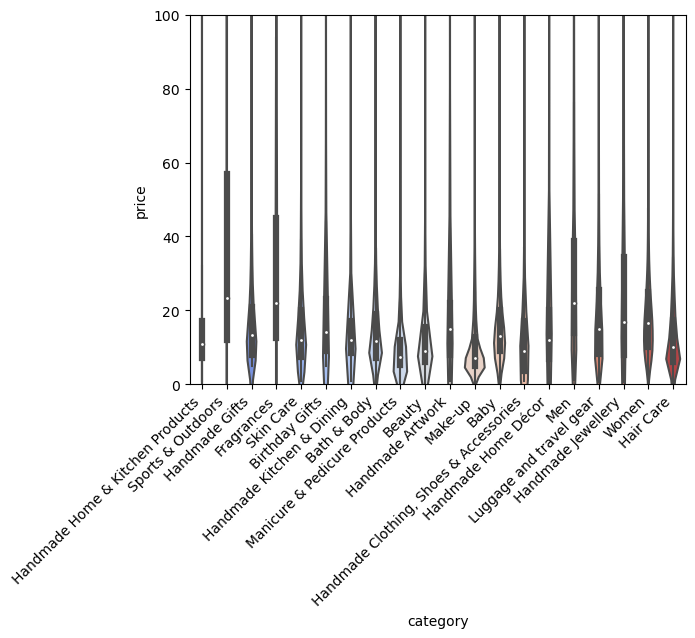

In [56]:
sns.violinplot(data=df_top_cat, x='category', y='price', palette="coolwarm")
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')

In [19]:
# 1.b. Which product category tends to have the highest median price? Don't filter here by top categories.
median_per_cat = df.groupby('category').agg({'price': 'median'}).reset_index()
median_per_cat.sort_values('price', ascending=False)

,category,price
165,Laptops,1042.725
75,Desktop PCs,810.400
260,Snowboards,366.725
134,Home Audio Record Players,326.080
0,3D Printers,319.000
...,...,...
4,Adapters,7.050
176,Make-up,7.000
246,Signs & Plaques,6.990
8,Arts & Crafts,5.990


In [20]:
# 2.a. Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
top_10_cat = category_counts_top.head(10)
top_10_cat_list = top_10_cat.index.tolist()
df_top_10_cat = df[df['category'].isin(top_10_cat_list)]
av_pr_top_10 = df_top_10_cat.groupby('category').agg({'price':'mean'}).reset_index()
av_pr_top_10

,category,price
0,Bath & Body,15.042266
1,Beauty,13.222322
2,Birthday Gifts,26.585166
3,Hair Care,14.326030
4,"Handmade Clothing, Shoes & Accessories",16.865767
5,Handmade Gifts,20.974460
6,Make-up,10.895356
7,Manicure & Pedicure Products,10.521108
8,Skin Care,16.340926
9,Sports & Outdoors,125.769814


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bath & Body'),
  Text(1, 0, 'Beauty'),
  Text(2, 0, 'Birthday Gifts'),
  Text(3, 0, 'Hair Care'),
  Text(4, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(5, 0, 'Handmade Gifts'),
  Text(6, 0, 'Make-up'),
  Text(7, 0, 'Manicure & Pedicure Products'),
  Text(8, 0, 'Skin Care'),
  Text(9, 0, 'Sports & Outdoors')])

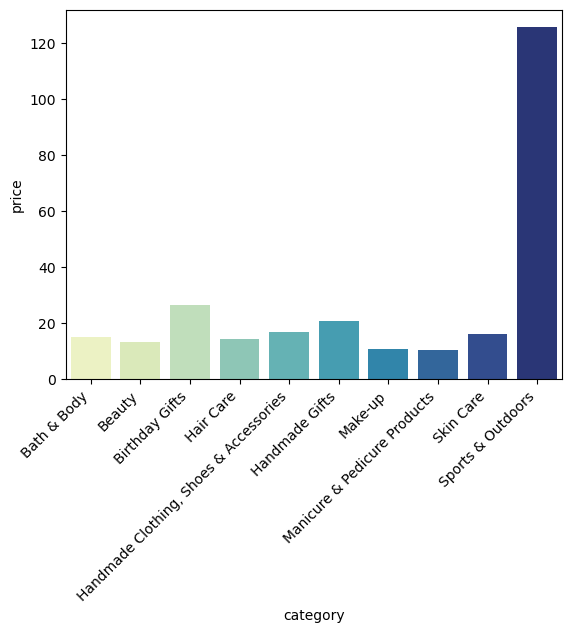

In [21]:
sns.barplot(data=av_pr_top_10, x='category', y='price', palette="YlGnBu")
plt.xticks(rotation=45, ha='right')

In [22]:
# 2.b. Which product category commands the highest average price? Don't filter here by top categories.

mean_per_cat = df.groupby('category').agg({'price': 'mean'}).reset_index()
mean_per_cat.sort_values('price', ascending=False)

,category,price
165,Laptops,1087.987827
0,3D Printers,1018.036129
75,Desktop PCs,926.816064
141,Home Office Furniture,622.135898
278,Test & Measurement,559.382973
...,...,...
22,Bedding Accessories,8.835220
4,Adapters,8.750197
246,Signs & Plaques,8.275136
8,Arts & Crafts,8.182523


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Handmade Gifts'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

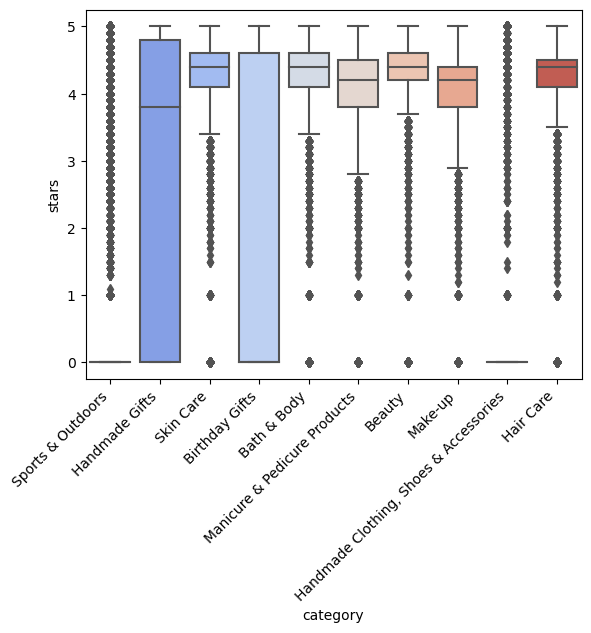

In [23]:
# 3.a. Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 
#      categories based on count for better visualization.
sns.boxplot(data=df_top_10_cat, x='category', y='stars', palette="coolwarm")
plt.xticks(rotation=45, ha='right')

In [24]:
# 3.b. Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
median_rating_per_cat = df.groupby('category').agg({'stars': 'median'}).reset_index()
median_rating_per_cat.sort_values('stars', ascending=False)

,category,stars
56,Computer Memory,4.7
132,Hobbies,4.6
25,"Beer, Wine & Spirits",4.6
164,Laptop Accessories,4.6
157,Kids' Play Figures,4.6
...,...,...
152,KVM Switches,0.0
153,Karaoke Equipment,0.0
163,Lab & Scientific Products,0.0
165,Laptops,0.0


Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

    1. Correlation Coefficients:
        a. Calculate the correlation coefficient between price and stars.
        b. Is there a significant correlation between product price and its rating?

    2. Visualizations:
        a. Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
        b. Use a correlation heatmap to visualize correlations between all numerical variables.
        c. Examine if product prices typically follow a normal distribution using a QQ plot.

In [26]:
# 1.a. Calculate the correlation coefficient between price and stars.
corr_pearson = df['price'].corr(df['stars'])
corr_spearman = df['price'].corr(df['stars'], method='spearman')
corr_pearson, corr_spearman

(-0.1249067326214869, -0.13316425462433937)

In [27]:
# 1.b. Is there a significant correlation between product price and its rating?
# there is slight negative correlation between 2 variables. with correlation coeffitient being (-0.1249067326214869, -0.13316425462433937)
# according to pearson'a and spearman's correlation accordingly.

<Axes: xlabel='stars', ylabel='price'>

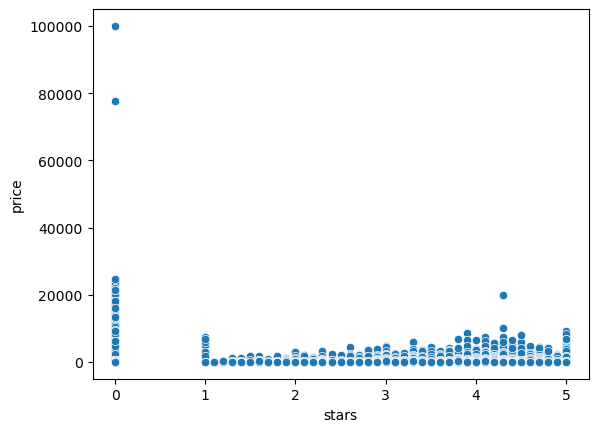

In [28]:
# 2.a. Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
sns.scatterplot(data=df, x='stars', y='price')
# the higher the raiting, the prices are slightly higher too if we ignor outliers.

Text(0.5, 1.0, 'Correlation Heatmap for All Numerical Variables')

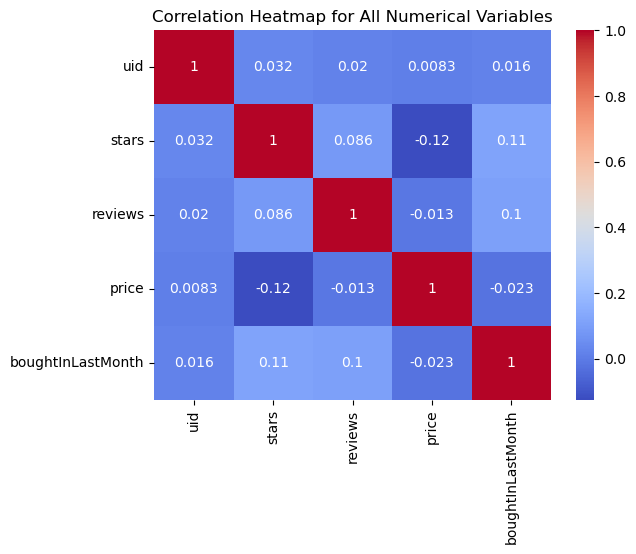

In [72]:
# 2.b. Use a correlation heatmap to visualize correlations between all numerical variables.
df_numerical = df.select_dtypes('number')
df_numerical
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for All Numerical Variables")

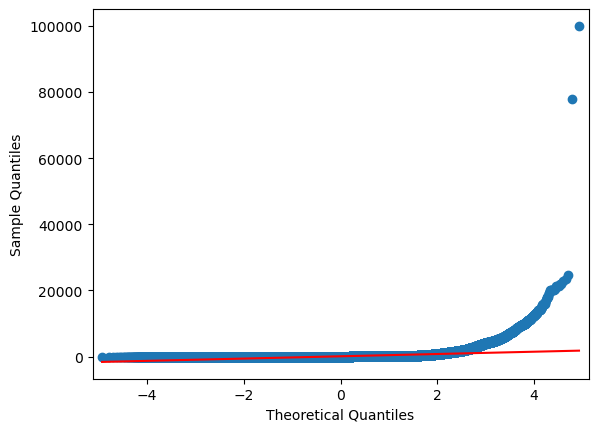

In [74]:
# 2.c. Examine if product prices typically follow a normal distribution using a QQ plot.
import statsmodels.api as sm
sm.qqplot(df['price'], line='s');
# the prices dont follow a normal distribution

(0.0, 20000.0)

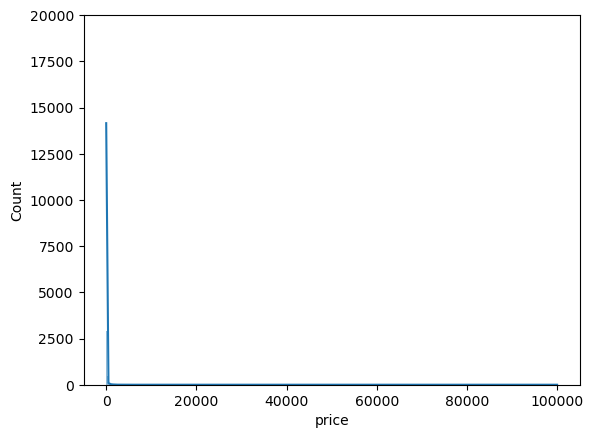

In [78]:
sns.histplot(df['price'], kde = True)
plt.ylim(0, 20000)